<a href="https://colab.research.google.com/github/VikasBelida09/SP23-Team5/blob/main/Team5_sprint1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [108]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import LatentDirichletAllocation
from collections import Counter


In [110]:
path="/content/drive/MyDrive/dataset/Zoom-features-2022.xlsx"


In [111]:
dfs = pd.read_excel(path, sheet_name=["Dec-2022", "Nov-2022", "Oct-2022", "Sept-2022", "Aug-2022", "July-2022", "June-2022", "May-2022", "April-2022", "March-2022", "Feb-2022", "Jan-2022"])
merged_df = pd.concat(dfs.values(), ignore_index=True)

In [112]:
merged_df

,Group / Category,Feature Title,Feature Description,Release Date,Release Version
0,Meeting features,Custom human avatars,"In addition to the animal avatars, users can c...",2022-12-27,version 5.13.3 (11494)
1,General features,Additional MSI/PLIST/GPO/MDM options: Disable ...,"Disabled by default, this option allows admins...",2022-12-20,version 5.13.0 (11216)
2,General features,Additional MSI/PLIST/GPO/MDM options: Download...,"Enabled by default, when a VDI environment is ...",2022-12-20,version 5.13.0 (11216)
3,General features,Additional MSI/PLIST/GPO/MDM options: Support ...,"Disabled by default, this allows the client to...",2022-12-20,version 5.13.0 (11216)
4,General features,Additional MSI/PLIST/GPO/MDM options: Disable ...,"Enabled by default, this allows admins to disa...",2022-12-20,version 5.13.0 (11216)
...,...,...,...,...,...
277,Meeting/webinar features,Additional Blur Background enablement methods,"Users can quickly blur their backgrounds, with...",2022-01-24,version 5.9.3 (3169)
278,Meeting/webinar features,Post-meeting virtual background auto-reversal,Users can select and use any virtual backgroun...,2022-01-24,version 5.9.3 (3169)
279,Meeting features,"Create, remove, rename breakout rooms after la...",Breakout rooms no longer need to be closed in ...,2022-01-24,version 5.9.3 (3169)
280,Meeting features,Add video to waiting room,"Account owners, admins, and users can add a vi...",2022-01-24,version 5.9.3 (3169)


In [113]:
df2=merged_df.copy()

In [114]:
df2

,Group / Category,Feature Title,Feature Description,Release Date,Release Version
0,Meeting features,Custom human avatars,"In addition to the animal avatars, users can c...",2022-12-27,version 5.13.3 (11494)
1,General features,Additional MSI/PLIST/GPO/MDM options: Disable ...,"Disabled by default, this option allows admins...",2022-12-20,version 5.13.0 (11216)
2,General features,Additional MSI/PLIST/GPO/MDM options: Download...,"Enabled by default, when a VDI environment is ...",2022-12-20,version 5.13.0 (11216)
3,General features,Additional MSI/PLIST/GPO/MDM options: Support ...,"Disabled by default, this allows the client to...",2022-12-20,version 5.13.0 (11216)
4,General features,Additional MSI/PLIST/GPO/MDM options: Disable ...,"Enabled by default, this allows admins to disa...",2022-12-20,version 5.13.0 (11216)
...,...,...,...,...,...
277,Meeting/webinar features,Additional Blur Background enablement methods,"Users can quickly blur their backgrounds, with...",2022-01-24,version 5.9.3 (3169)
278,Meeting/webinar features,Post-meeting virtual background auto-reversal,Users can select and use any virtual backgroun...,2022-01-24,version 5.9.3 (3169)
279,Meeting features,"Create, remove, rename breakout rooms after la...",Breakout rooms no longer need to be closed in ...,2022-01-24,version 5.9.3 (3169)
280,Meeting features,Add video to waiting room,"Account owners, admins, and users can add a vi...",2022-01-24,version 5.9.3 (3169)


In [115]:
df2['Release Date'][0]

Timestamp('2022-12-27 00:00:00')

In [116]:
df2['Release Date']=pd.to_datetime(df2['Release Date'])

In [117]:
df2['Release Month']=df2['Release Date'].dt.month

In [118]:
df2 

,Group / Category,Feature Title,Feature Description,Release Date,Release Version,Release Month
0,Meeting features,Custom human avatars,"In addition to the animal avatars, users can c...",2022-12-27,version 5.13.3 (11494),12.0
1,General features,Additional MSI/PLIST/GPO/MDM options: Disable ...,"Disabled by default, this option allows admins...",2022-12-20,version 5.13.0 (11216),12.0
2,General features,Additional MSI/PLIST/GPO/MDM options: Download...,"Enabled by default, when a VDI environment is ...",2022-12-20,version 5.13.0 (11216),12.0
3,General features,Additional MSI/PLIST/GPO/MDM options: Support ...,"Disabled by default, this allows the client to...",2022-12-20,version 5.13.0 (11216),12.0
4,General features,Additional MSI/PLIST/GPO/MDM options: Disable ...,"Enabled by default, this allows admins to disa...",2022-12-20,version 5.13.0 (11216),12.0
...,...,...,...,...,...,...
277,Meeting/webinar features,Additional Blur Background enablement methods,"Users can quickly blur their backgrounds, with...",2022-01-24,version 5.9.3 (3169),1.0
278,Meeting/webinar features,Post-meeting virtual background auto-reversal,Users can select and use any virtual backgroun...,2022-01-24,version 5.9.3 (3169),1.0
279,Meeting features,"Create, remove, rename breakout rooms after la...",Breakout rooms no longer need to be closed in ...,2022-01-24,version 5.9.3 (3169),1.0
280,Meeting features,Add video to waiting room,"Account owners, admins, and users can add a vi...",2022-01-24,version 5.9.3 (3169),1.0


<h1><b>Exploratory Data Analysis</b></h1>

<h1>Histogram shows number of features released per month</h1>

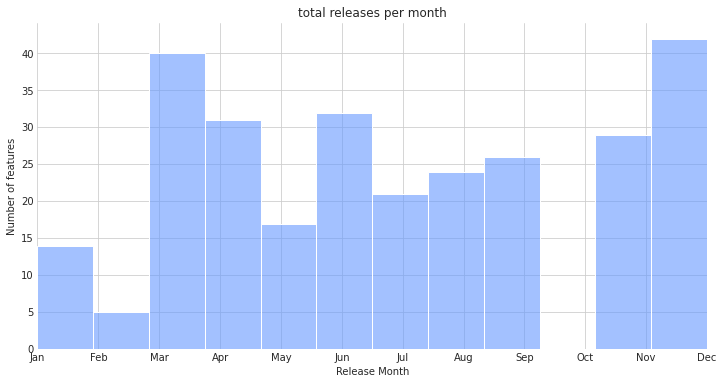

In [119]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,6))
plot=sns.histplot(data=df2, x='Release Month',color=(0.4, 0.6, 1, 0.5),bins=12,alpha=0.6)
plt.xticks(range(1, 13), [pd.Timestamp(2022, i, 1).strftime('%b') for i in range(1, 13)])
plot.set(xlabel="Release Month", ylabel="Number of features",title="total releases per month")
plt.xlim(1,12)
plt.show()

In [120]:
summary=df2.groupby(df2['Release Month'])['Feature Title'].describe()

In [121]:
summary

,count,unique,top,freq
Release Month,,,,
1.0,14,14,Additional MSI/PLIST/GPO/MDM options: Require ...,1
2.0,5,5,Language Interpretation relay enhancement,1
3.0,40,40,Support for Apple authentication,1
4.0,31,31,Chat Etiquette Tool,1
5.0,17,17,Share Zoom Whiteboard to Zoom Chat channels,1
6.0,32,31,Support for Zoom Apps in Webinars,2
7.0,21,21,Indonesian language support,1
8.0,24,24,Enhanced access to cloud recordings,1
9.0,26,26,Profile Card enhancements,1


<h2>Figuring out how many null values are present in the feature columns</h2>

In [122]:
df2.isna().sum()

Group / Category       0
Feature Title          1
Feature Description    1
Release Date           1
Release Version        1
Release Month          1
dtype: int64

In [123]:
l=df2[df2['Feature Title'].isnull()].index.tolist()
print(len(l))

1


In [124]:
df2.iloc[[l[0]]]

,Group / Category,Feature Title,Feature Description,Release Date,Release Version,Release Month
71,(only resolved issues),NaN,NaN,NaT,NaN,NaN


<h2>It is clear that the null values are due to no data in October month. so we can remove that row</h2>

In [125]:
df2=df2.drop(l[0])

In [126]:
df2

,Group / Category,Feature Title,Feature Description,Release Date,Release Version,Release Month
0,Meeting features,Custom human avatars,"In addition to the animal avatars, users can c...",2022-12-27,version 5.13.3 (11494),12.0
1,General features,Additional MSI/PLIST/GPO/MDM options: Disable ...,"Disabled by default, this option allows admins...",2022-12-20,version 5.13.0 (11216),12.0
2,General features,Additional MSI/PLIST/GPO/MDM options: Download...,"Enabled by default, when a VDI environment is ...",2022-12-20,version 5.13.0 (11216),12.0
3,General features,Additional MSI/PLIST/GPO/MDM options: Support ...,"Disabled by default, this allows the client to...",2022-12-20,version 5.13.0 (11216),12.0
4,General features,Additional MSI/PLIST/GPO/MDM options: Disable ...,"Enabled by default, this allows admins to disa...",2022-12-20,version 5.13.0 (11216),12.0
...,...,...,...,...,...,...
277,Meeting/webinar features,Additional Blur Background enablement methods,"Users can quickly blur their backgrounds, with...",2022-01-24,version 5.9.3 (3169),1.0
278,Meeting/webinar features,Post-meeting virtual background auto-reversal,Users can select and use any virtual backgroun...,2022-01-24,version 5.9.3 (3169),1.0
279,Meeting features,"Create, remove, rename breakout rooms after la...",Breakout rooms no longer need to be closed in ...,2022-01-24,version 5.9.3 (3169),1.0
280,Meeting features,Add video to waiting room,"Account owners, admins, and users can add a vi...",2022-01-24,version 5.9.3 (3169),1.0


In [127]:
df2.isna().sum()

Group / Category       0
Feature Title          0
Feature Description    0
Release Date           0
Release Version        0
Release Month          0
dtype: int64


<h1>Wordcloud to visualise the frequency of the words</h1>



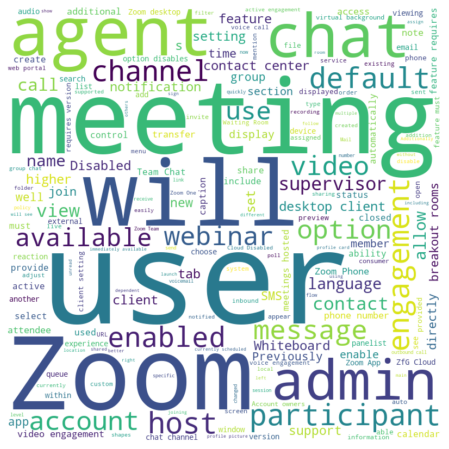

In [128]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = " ".join(df2['Feature Description'].values)

wordcloud = WordCloud(width=800, height=800, background_color='white').generate(text)

plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


<h1>Bar Chart to show the frequency of the most common words in Feature Decription</h1>

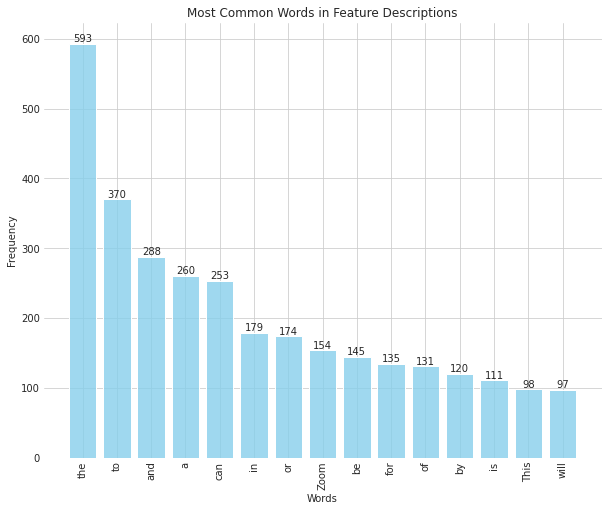

In [129]:
all_features = " ".join(df2['Feature Description'].astype(str))
words = all_features.split()
word_counts=Counter(words)
most_common=word_counts.most_common(15)

color = (0.53, 0.81, 0.92, 0.8)
plt.figure(figsize=(10,8))
plt.bar(range(len(most_common)), [val[1] for val in most_common], align='center',color=color)
plt.xticks(range(len(most_common)), [val[0] for val in most_common], rotation=90)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Most Common Words in Feature Descriptions')
for ind,word_freq in enumerate(most_common):
  plt.text(ind,word_freq[1],str(word_freq[1]),ha='center',va='bottom')
plt.show()

<h2>Now we have removed all the null rows</h2>

<h1><b>Data Preprocessing</b></h1>

<h2>1. Lowercase the text data</h2>

In [130]:
df2['Feature Title']=df2['Feature Title'].str.lower()
df2['Feature Description']=df2['Feature Description'].str.lower()

In [131]:
df2

,Group / Category,Feature Title,Feature Description,Release Date,Release Version,Release Month
0,Meeting features,custom human avatars,"in addition to the animal avatars, users can c...",2022-12-27,version 5.13.3 (11494),12.0
1,General features,additional msi/plist/gpo/mdm options: disable ...,"disabled by default, this option allows admins...",2022-12-20,version 5.13.0 (11216),12.0
2,General features,additional msi/plist/gpo/mdm options: download...,"enabled by default, when a vdi environment is ...",2022-12-20,version 5.13.0 (11216),12.0
3,General features,additional msi/plist/gpo/mdm options: support ...,"disabled by default, this allows the client to...",2022-12-20,version 5.13.0 (11216),12.0
4,General features,additional msi/plist/gpo/mdm options: disable ...,"enabled by default, this allows admins to disa...",2022-12-20,version 5.13.0 (11216),12.0
...,...,...,...,...,...,...
277,Meeting/webinar features,additional blur background enablement methods,"users can quickly blur their backgrounds, with...",2022-01-24,version 5.9.3 (3169),1.0
278,Meeting/webinar features,post-meeting virtual background auto-reversal,users can select and use any virtual backgroun...,2022-01-24,version 5.9.3 (3169),1.0
279,Meeting features,"create, remove, rename breakout rooms after la...",breakout rooms no longer need to be closed in ...,2022-01-24,version 5.9.3 (3169),1.0
280,Meeting features,add video to waiting room,"account owners, admins, and users can add a vi...",2022-01-24,version 5.9.3 (3169),1.0


<h1>2. Removing Stop Words and punctuations</h1>

In [132]:
nlp = spacy.load("en_core_web_sm")
def remove_stop_words(text):
  doc=nlp(text)
  no_stop_words=[token.text for token in doc if not token.is_stop and not token.is_punct]
  return " ".join(no_stop_words)

In [133]:
df2['Feature Description']=df2['Feature Description'].apply(remove_stop_words)

In [134]:
df2['Feature Description'][0]

'addition animal avatars users create custom human avatars meetings customization options include numerous facial features colors choose'

<h1>3. Lemmatization</h1>

In [135]:
def lemmatize_text(text):
   doc=nlp(text)
   lemmatized_words=[token.lemma_ for token in doc]
   return ' '.join(lemmatized_words)

In [136]:
df2['Feature Description']=df2['Feature Description'].apply(lemmatize_text)

In [137]:
df2

,Group / Category,Feature Title,Feature Description,Release Date,Release Version,Release Month
0,Meeting features,custom human avatars,addition animal avatar user create custom huma...,2022-12-27,version 5.13.3 (11494),12.0
1,General features,additional msi/plist/gpo/mdm options: disable ...,disabled default option allow admin disable us...,2022-12-20,version 5.13.0 (11216),12.0
2,General features,additional msi/plist/gpo/mdm options: download...,enable default vdi environment detect zoomplug...,2022-12-20,version 5.13.0 (11216),12.0
3,General features,additional msi/plist/gpo/mdm options: support ...,disabled default allow client support window e...,2022-12-20,version 5.13.0 (11216),12.0
4,General features,additional msi/plist/gpo/mdm options: disable ...,enable default allow admin disable desktop cli...,2022-12-20,version 5.13.0 (11216),12.0
...,...,...,...,...,...,...
277,Meeting/webinar features,additional blur background enablement methods,user quickly blur background need access zoom ...,2022-01-24,version 5.9.3 (3169),1.0
278,Meeting/webinar features,post-meeting virtual background auto-reversal,user select use virtual background zoom meetin...,2022-01-24,version 5.9.3 (3169),1.0
279,Meeting features,"create, remove, rename breakout rooms after la...",breakout room long need closed order rename ad...,2022-01-24,version 5.9.3 (3169),1.0
280,Meeting features,add video to waiting room,account owner admin user add video customizing...,2022-01-24,version 5.9.3 (3169),1.0


<h1>Feature Extraction</h1>

In [138]:
tfidf_vectorizer = TfidfVectorizer()

In [139]:
tfidf = tfidf_vectorizer.fit_transform(df2['Feature Description'])

In [140]:
print(tfidf.toarray())

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.31238481]
 ...
 [0.         0.         0.         ... 0.         0.07460912 0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.22946565 0.        ]]


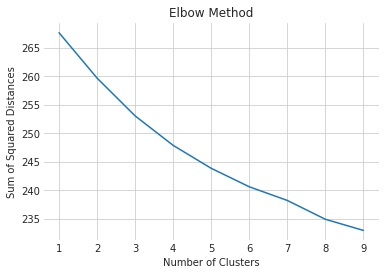

In [141]:
ssd = []
for k in range(1,10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(tfidf)
    ssd.append(kmeans.inertia_)

plt.plot(range(1, 10), ssd)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.show()

In [142]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(tfidf)
cluster_labels = kmeans.labels_
for cluster_id in range(5):
    print(f"Documents in Cluster {cluster_id}:")
    cluster_docs = df2['Feature Description'][cluster_labels == cluster_id]
    ldocs=cluster_docs.tolist()
    for doc in ldocs:
      print(doc)
    print("="*50)

Documents in Cluster 0:
user schedule meeting member chat channel directly team chat successfully schedule meeting add calendar provide notification option copy invitation appear meeting card chat feature require chat member calendar integrate zoom currently support google calendar office 365 oauth 2.0 set available account group level
chat channel owner admin create custom mention group user tag group mention 100 member assign mention group member able leave group time channel support 10 different mention group group mention work channel create
channel owner designate admin delete message send user channel previously message delete sender
toolbar shortcut chat compose box customize term order icon option currently visible customization affect main chat compose box chat group channel chat compose box reply message visibility voice message video message code snippet option control corresponding option team chat tab client setting remove
setting control chat notification update clarity e

In [143]:
cutoff_date = pd.to_datetime('2022-06-30')
df2['label']=df2['Release Date'].apply(lambda x: 'old' if x<=cutoff_date else 'New')

In [144]:
df2

,Group / Category,Feature Title,Feature Description,Release Date,Release Version,Release Month,label
0,Meeting features,custom human avatars,addition animal avatar user create custom huma...,2022-12-27,version 5.13.3 (11494),12.0,New
1,General features,additional msi/plist/gpo/mdm options: disable ...,disabled default option allow admin disable us...,2022-12-20,version 5.13.0 (11216),12.0,New
2,General features,additional msi/plist/gpo/mdm options: download...,enable default vdi environment detect zoomplug...,2022-12-20,version 5.13.0 (11216),12.0,New
3,General features,additional msi/plist/gpo/mdm options: support ...,disabled default allow client support window e...,2022-12-20,version 5.13.0 (11216),12.0,New
4,General features,additional msi/plist/gpo/mdm options: disable ...,enable default allow admin disable desktop cli...,2022-12-20,version 5.13.0 (11216),12.0,New
...,...,...,...,...,...,...,...
277,Meeting/webinar features,additional blur background enablement methods,user quickly blur background need access zoom ...,2022-01-24,version 5.9.3 (3169),1.0,old
278,Meeting/webinar features,post-meeting virtual background auto-reversal,user select use virtual background zoom meetin...,2022-01-24,version 5.9.3 (3169),1.0,old
279,Meeting features,"create, remove, rename breakout rooms after la...",breakout room long need closed order rename ad...,2022-01-24,version 5.9.3 (3169),1.0,old
280,Meeting features,add video to waiting room,account owner admin user add video customizing...,2022-01-24,version 5.9.3 (3169),1.0,old


In [145]:
df2['label'].value_counts()

New    142
old    139
Name: label, dtype: int64

In [146]:
df2['label']=df2['label'].apply(lambda x: 1 if x=='New' else 0)


In [147]:
kmeans.labels_

array([1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 4, 0, 0, 1, 4, 1, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 1, 1,
       1, 4, 4, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 2,
       2, 2, 4, 2, 2, 4, 1, 3, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 2, 2, 1, 2, 2, 2, 4, 1, 1, 1, 1, 1, 1, 1, 0, 3, 4, 1, 1, 4,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 4,
       1, 4, 2, 2, 2, 4, 2, 2, 2, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 4, 4, 1, 4, 2, 2, 2, 2, 2, 1, 1, 0, 1,
       1, 1, 1, 0, 4, 1, 4, 4, 4, 2, 2, 1, 4, 2, 1, 0, 1, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 0, 1, 1, 1, 1, 1, 1, 4, 4, 1, 2, 1,
       2, 4, 1, 1, 4, 1, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 4, 2, 1, 4, 2, 2, 2, 2, 1, 4,
       1, 0, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

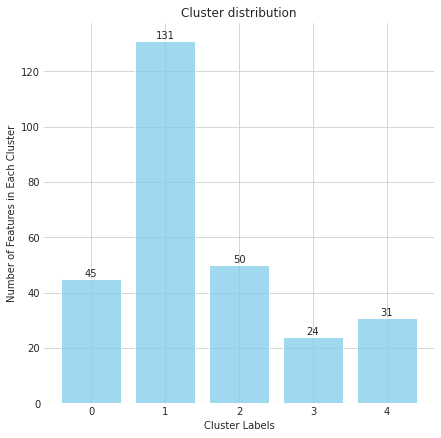

In [160]:

unique_labels, counts = np.unique(kmeans.labels_, return_counts=True)
color = (0.53, 0.81, 0.92, 0.8)
plt.figure(figsize=(7,7))
plt.bar(unique_labels, counts, align='center',color=color)
plt.gca().set_xticks(unique_labels)
plt.xlabel('Cluster Labels')
plt.ylabel('Number of Features in Each Cluster')
plt.title('Cluster distribution')
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.show()

In [149]:
cluster_label_class={}

In [150]:
for i in range(5):
  a=df2['label'][cluster_labels==i]
  counts=a.value_counts()
  percent_0 = (counts[0]/counts.sum()) * 100
  percent_1 = (counts[1]/counts.sum()) * 100
  if percent_0 > percent_1+3:
    cluster_label_class[i]='Old'
  if percent_1 > percent_0+3:
    cluster_label_class[i]='New'
  print(f'Old Features Percentage {percent_0},New Features Percentage {percent_1}')

Old Features Percentage 53.333333333333336,New Features Percentage 46.666666666666664
Old Features Percentage 50.38167938931297,New Features Percentage 49.61832061068702
Old Features Percentage 30.0,New Features Percentage 70.0
Old Features Percentage 79.16666666666666,New Features Percentage 20.833333333333336
Old Features Percentage 48.38709677419355,New Features Percentage 51.61290322580645


<h1>From the above printed cluster features percentages we can discard cluster with Label 1 because the difference between new and old is negligible</h1>

In [151]:
cluster_label_class

{0: 'Old', 2: 'New', 3: 'Old', 4: 'New'}

In [152]:
def reverse_dict(dictionary):
    reverse = {}
    for key, value in dictionary.items():
        if value not in reverse:
            reverse[value] = [key]
        else:
            reverse[value].append(key)
    return reverse


In [153]:
reversed_dict=reverse_dict(cluster_label_class)

In [154]:
reversed_dict

{'Old': [0, 3], 'New': [2, 4]}

<h1>Out of 5 clusters, cluster 0,3 contains Old features and 2,4 contains New features</h1>

In [155]:
def model_topics(df,feature_name):
  tf_idf_vect = TfidfVectorizer()
  tfidf_vectors = tf_idf_vect.fit_transform(df[feature_name])
  lda = LatentDirichletAllocation(n_components=5)
  lda.fit(tfidf_vectors)
  feature_names = tf_idf_vect.get_feature_names_out()
  for topic_idx, topic in enumerate(lda.components_):
    print(f"Topic {topic_idx}:")
    print(", ".join([feature_names[i] for i in topic.argsort()[:-11:-1]]))


In [157]:

for key, value in reversed_dict.items():
  print(f'Performing topic Modelling on {key} Clusters\n')
  temp_df=pd.DataFrame(columns=['Feature Description'])
  for label in value:
    temp_df=pd.concat([temp_df,df2[cluster_labels==label]],axis=0)
  if key=='Old':
    model_topics(temp_df,'Feature Description')
  else:
    model_topics(temp_df,'Feature Description')
  print("="*50)

Performing topic Modelling on Old Clusters

Topic 0:
channel, member, search, mention, group, open, add, allow, room, broadcast
Topic 1:
option, meeting, default, host, disabled, disable, cloud, zfg, use, control
Topic 2:
channel, chat, zoom, 50, client, create, currently, account, rain, setting
Topic 3:
chat, group, user, channel, message, show, exist, link, zoom, gif
Topic 4:
channel, chat, message, provide, user, notification, team, zoom, folder, member
Performing topic Modelling on New Clusters

Topic 0:
contact, tab, refresh, supervisor, engagement, client, icon, desktop, change, unpaire
Topic 1:
engagement, chat, video, agent, active, phone, invite, user, participant, voice
Topic 2:
contact, number, phone, agent, avatar, center, zoom, book, match, address
Topic 3:
user, engagement, agent, zoom, search, note, supervisor, phone, active, client
Topic 4:
engagement, supervisor, agent, video, queue, status, zoom, call, consumer, view
